In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
data.dropna(inplace=True)

# Alternatively we can replace nulls in total_bedrooms with the median.
# data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


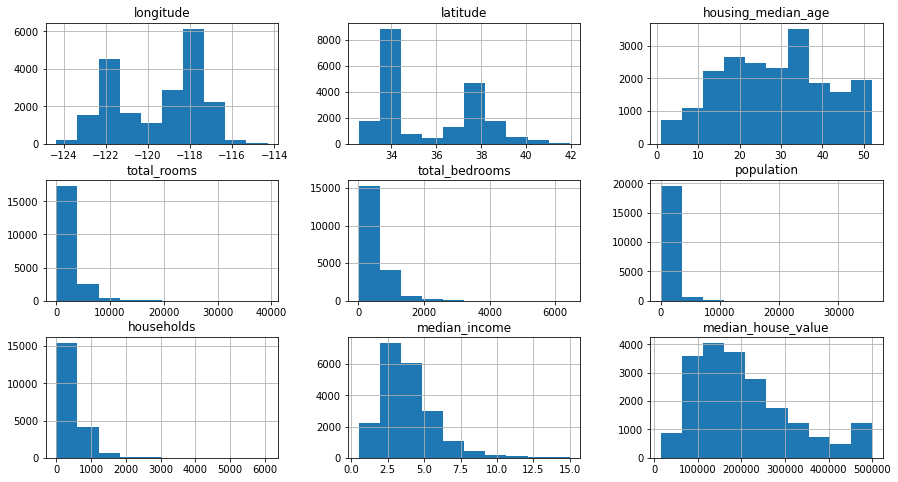

In [6]:
# checking the data's skewness
# We will need to perform transformations(after splitting) on data with obvious skews like total_rooms, total_bedrooms, population, and households.
data.hist(figsize=(15, 8))
plt.show()

In [7]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# We need to perform data transformation on categorical data.
from sklearn.preprocessing import OneHotEncoder

Note:
OneHotEncoder in scikit-learn does not retain the index column by default.  When you apply the fit_transform method to a dataset, it will return either a new numpy array or a sparse matrix.  the original index is not preserved in the output.

In [9]:
ohe = OneHotEncoder(sparse_output=False)
encoded_data = ohe.fit_transform(data['ocean_proximity'].values.reshape(-1,1))
encoded_data = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(), index=data.index)  

# index=data.index is used to maintain the same index from original data.  This avoids producing NaN values when joining the encoded data and the original data together.
encoded_data

,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [10]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   x0_<1H OCEAN   20433 non-null  float64
 1   x0_INLAND      20433 non-null  float64
 2   x0_ISLAND      20433 non-null  float64
 3   x0_NEAR BAY    20433 non-null  float64
 4   x0_NEAR OCEAN  20433 non-null  float64
dtypes: float64(5)
memory usage: 957.8 KB


In [11]:
if not data.index.equals(encoded_data.index):
    print("Indices are not aligned between train_data and train_data_encoded.")
else:
    print('Indices of encoded data are aligned with housing data.')

Indices of encoded data are aligned with housing data.


In [12]:
data = data.join(encoded_data).drop(['ocean_proximity'],axis=1)

In [13]:
# To ensure there's no null values when joining.
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [14]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
x0_<1H OCEAN          0
x0_INLAND             0
x0_ISLAND             0
x0_NEAR BAY           0
x0_NEAR OCEAN         0
dtype: int64

In [15]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
train_data = X_train.join(y_train)

In [18]:
train_data.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.691006
x0_<1H OCEAN          0.258366
x0_NEAR BAY           0.162559
x0_NEAR OCEAN         0.139733
total_rooms           0.136945
housing_median_age    0.104281
households            0.065772
total_bedrooms        0.051270
x0_ISLAND             0.026655
population           -0.025611
longitude            -0.048905
latitude             -0.142257
x0_INLAND            -0.484685
Name: median_house_value, dtype: float64

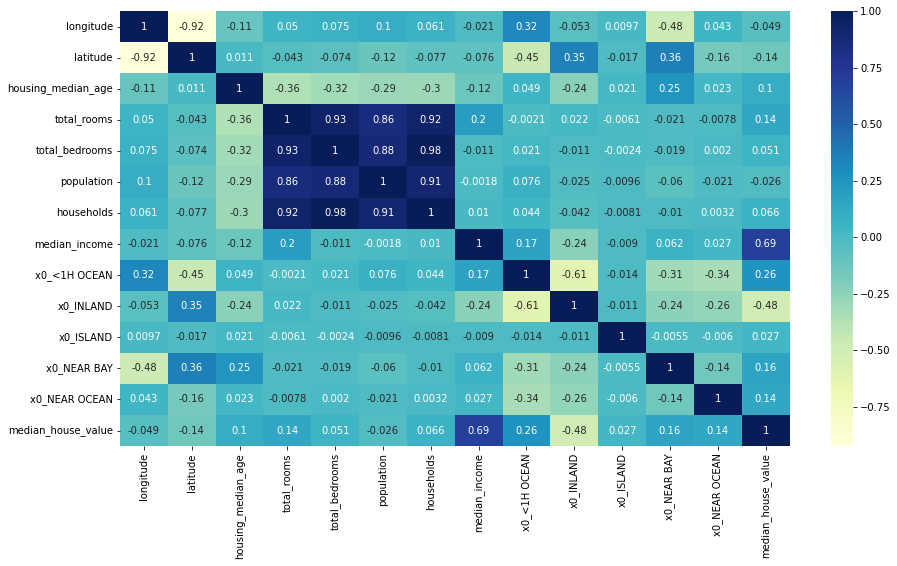

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap = 'YlGnBu')
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

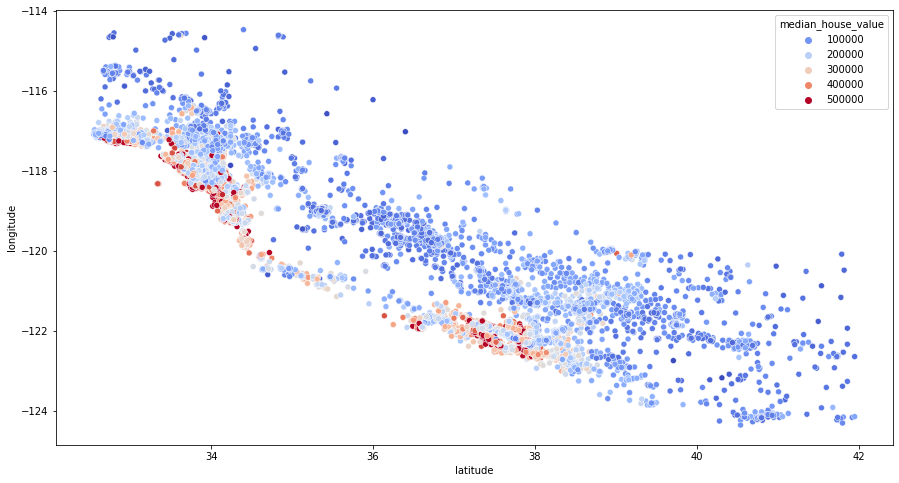

In [20]:
# To visualize coordinates:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

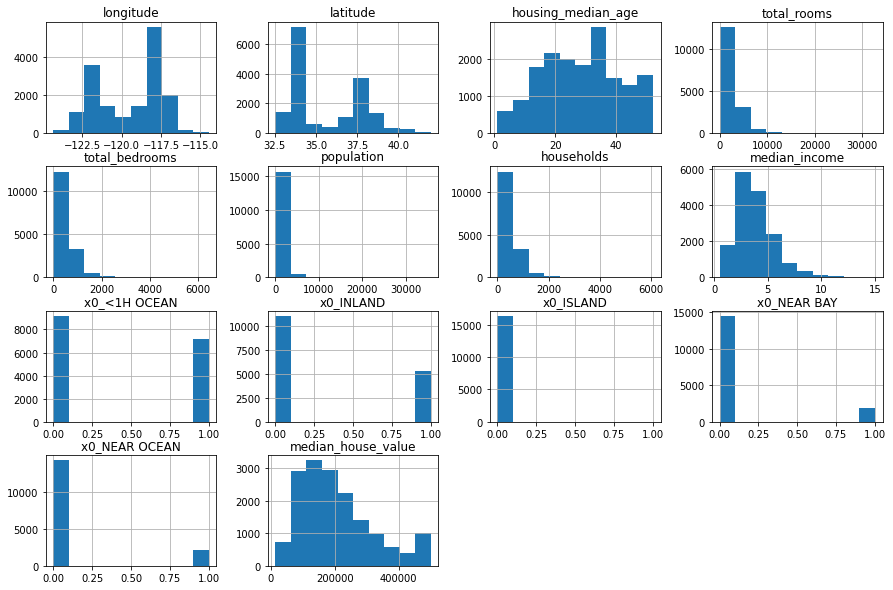

In [21]:
train_data.hist(figsize=(15,10))
plt.show()

## Pre-Processing

In [22]:
# Here we fix the skew of some features by using log transformation.
# Log transformations are generally very effective at treating positive and negative skewed data.
# We can perform specific transformations using Box Cox transformation but it is not necessary in the case of machine learning.
# The other features will be normalized via StandardScaler.

train_data['total_rooms'] = np.log(train_data['total_rooms']+1)  # +1 to prevent 0 values.
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

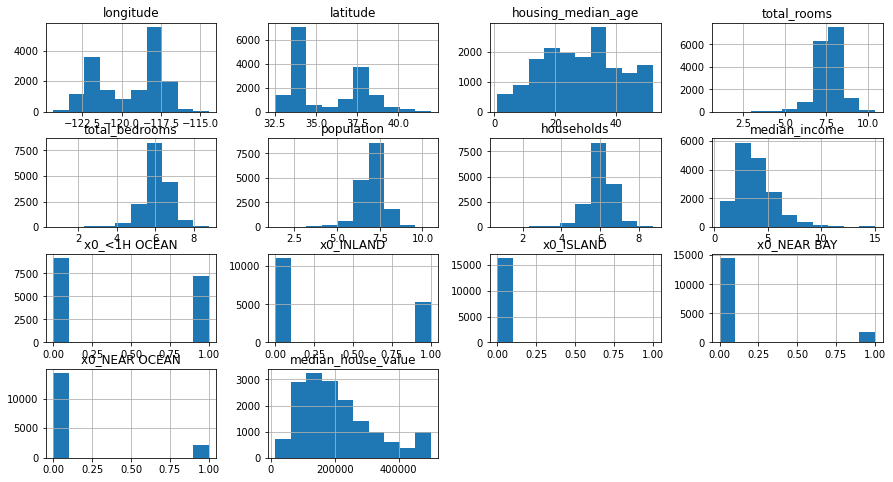

In [23]:
train_data.hist(figsize=(15,8))
plt.show()

## Feature Engineering

In [24]:
# We might also want to take features that we already have and combine them into new features.
# For example, we have total_rooms and we have total_bedrooms.  We can create a separate feature that shows the ratio of total_bedrooms over total_rooms.
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
 
# Another feature we can add is total room ratio to household.
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

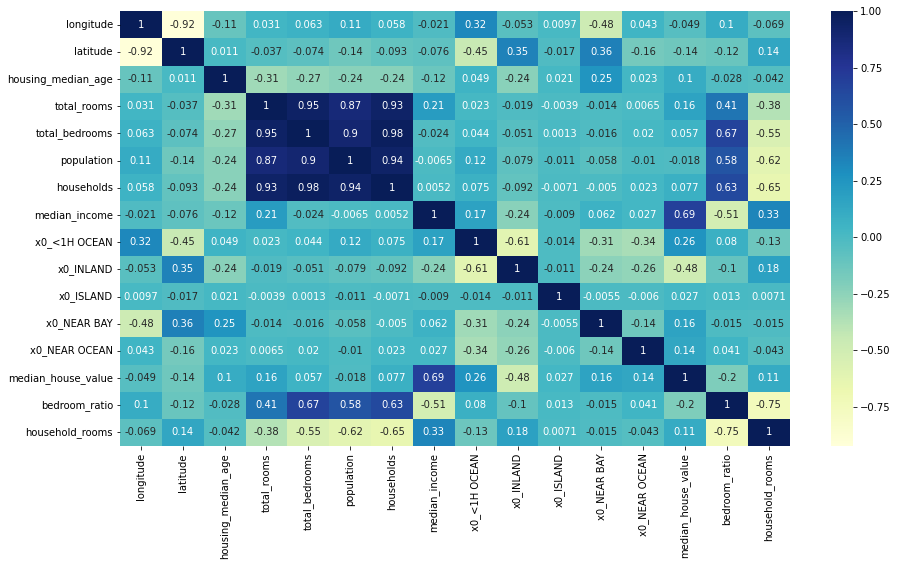

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

# we can see that household_rooms show stronger correlation to median_house_value when compared to just household itself.
# rooms are interesting but bedrooms aren't all the interesting by themselves but the bedroom ratio is quite interesting.

In [26]:
train_data.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.691006
x0_<1H OCEAN          0.258366
total_rooms           0.163514
x0_NEAR BAY           0.162559
x0_NEAR OCEAN         0.139733
household_rooms       0.110418
housing_median_age    0.104281
households            0.076732
total_bedrooms        0.056858
x0_ISLAND             0.026655
population           -0.018440
longitude            -0.048905
latitude             -0.142257
bedroom_ratio        -0.200421
x0_INLAND            -0.484685
Name: median_house_value, dtype: float64

## Model Evaluation

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()   # StandardScaler standardizes your features via z score normalization.

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

In [29]:
X_train_s = scaler.fit_transform(X_train)  
# scaler.fit computes and saves the mean and std.  scaler.fit_transform computes the mean and std and use it to transform the data.
# usually we don't need to scale the output.
reg = LinearRegression()  # assign our regressor to be linear regression

reg.fit(X_train_s, y_train)  # fit method basically fits our our model to the training data.  It figure out the coefficients and intercept based on our training data.

LinearRegression()

In [30]:
reg.score(X_train_s, y_train)

0.6741792098856573

In [31]:
print(reg.coef_)
print(reg.intercept_)

[-58058.30854917 -60322.32712325  13431.69801433 -69879.87961921
 119429.91273199 -68872.57233685  30135.13800304  81043.29437738
   5930.33375942  -9728.68662526   2372.66303869   1275.23210778
   3485.20471465 -18443.52684137  -4091.36194497]
206510.5874219993


In [32]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)  # +1 to prevent 0 values.
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [33]:
test_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN,median_house_value,bedroom_ratio,household_rooms
10288,-117.84,33.89,19.0,8.173293,6.297109,7.488853,6.329721,6.7837,1.0,0.0,0.0,0.0,0.0,264300.0,0.770449,1.291257
14679,-117.10,32.83,16.0,6.956545,5.043425,6.148468,5.081404,6.2047,1.0,0.0,0.0,0.0,0.0,248100.0,0.724990,1.369020
11340,-117.93,33.75,24.0,7.230563,5.828946,7.295056,5.720312,4.2219,1.0,0.0,0.0,0.0,0.0,162800.0,0.806154,1.264016
1632,-122.17,37.87,38.0,7.140453,5.181784,6.159095,5.214936,6.9170,0.0,0.0,0.0,1.0,0.0,438000.0,0.725694,1.369231
18716,-122.40,40.62,9.0,8.475329,6.791221,7.679251,6.763885,3.1439,0.0,1.0,0.0,0.0,0.0,103100.0,0.801293,1.253027


In [34]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [35]:
X_test_s = scaler.transform(X_test)
# we use scaler.transform here instead of scaler.fit_transform() because when we've already computed the mean and std earlier, when we ran scaler.fit_transform the first time.

In [36]:
reg.score(X_test_s, y_test)

0.6574847085898037

Because the R^2 values for both training and testing models are about the same, the model is not overfitting.

The score method in scikit-learn uses the learned parameters from the trained model(data fitted into a model via .fit() method) to make predictions on the testing data and then compares those predictions with the true target values to calculate the R^2.

Sklearn's model.score(X,y) calculation is based on co-efficient of determination i.e R^2 that takes model.score= (X_test,y_test). The y_predicted need not be supplied externally, rather it calculates y_predicted internally and uses it in the calculations.

This is how scikit-learn calculates model.score(X_test,y_test):

u = ((y_test - y_predicted) ** 2).sum()

v = ((y_test - y_test.mean()) ** 2).sum()

score = 1 - (u/v)

## Gradient Descent

In [37]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [38]:
sgdr = SGDRegressor(learning_rate='optimal', max_iter=10000)
sgdr.fit(X_train_s, y_train)
print(sgdr)

SGDRegressor(learning_rate='optimal', max_iter=10000)


In [39]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [-56465.3187849  -59823.94272861  12759.96799328  -2196.05694768
 -21589.20204383 -72900.17315174  89373.33269684  77674.85816834
   6720.15978391  -9795.71955781   3722.17978465    853.96712826
   2739.19107836  21650.08830642  14509.99568967], b:[206598.64471843]


In [40]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_train_s)
# make a prediction using w,b. 
y_pred = np.dot(X_train_s, w_norm) + b_norm  

print(f"Prediction on training set:\n{y_pred[:10]}" )

Prediction on training set:
[328165.6450776  209961.18400793 200526.87406705 195272.78895036
 157559.26126674 274925.87052251 177456.68147354 290057.90764934
 194197.2318525  279032.28868342]


In [41]:
print(f"Target values \n{y_train[:10]}")

Target values 
9298     324800.0
4741     234100.0
20252    219900.0
7595     105800.0
13097    157700.0
10346    248400.0
16302    152400.0
10322    288200.0
15933    233000.0
16808    237500.0
Name: median_house_value, dtype: float64


In [42]:
sgdr.score(X_train_s, y_train)

0.6677884552609475

## Lasso Regression

In [43]:
from sklearn.linear_model import Lasso

In [44]:
# Create an instance of Lasso with the desired alpha value
lasso_reg = Lasso(alpha=1, max_iter=50000)  # Example alpha value

# Fit the Lasso model to your training data
lasso_reg.fit(X_train_s, y_train)

# Make predictions using the trained Lasso model
lasso_reg.score(X_train_s, y_train)

0.6741791271520212

As we can see from the R^2 values, linear regression using OLS, gradient descent and OLS+regularization all produce similar results ~0.67.

We will need to move on with random forest to further optimize and hypertune our parameters.